In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
from glob import glob
from collections import OrderedDict
import xarray as xr
import numpy as np
import esmlab
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs
import seawater as sw
from seawater.library import T90conv
from scipy import stats

import ncar_jobqueue
from dask.distributed import Client

Note: this notebook uses means over the 5th IAF cycle.

These means were made using this notebook:
/glade/u/home/kristenk/besome/alk_calc_paper/make_5th_IAF_mean.ipynb

### get Alk control and noGCB

In [2]:
case='cesm22cocco.G1850ECOIAF.T62_g17.003'

In [3]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/mean5thIAF/mean_IAF5_ALK.nc'
cesm_ann_ds = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [4]:
#ALK
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/mean5thIAF/mean_IAF5_ALK_ALT_CO2.nc'
ds_tmp = xr.open_dataset(file,decode_times=False,decode_coords=False)
cesm_ann_ds['ALK_noGCB']=ds_tmp['ALK_ALT_CO2']

In [5]:
#get calcToSed
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/mean5thIAF/mean_IAF5_calcToSed.nc'
ds_tmp = xr.open_dataset(file,decode_times=False,decode_coords=False)
cesm_ann_ds['calcToSed']=ds_tmp['calcToSed']

In [6]:
#get calcToSed_ALT_CO2
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/mean5thIAF/mean_IAF5_calcToSed_ALT_CO2.nc'
ds_tmp = xr.open_dataset(file,decode_times=False,decode_coords=False)
cesm_ann_ds['calcToSed_noGCB']=ds_tmp['calcToSed_ALT_CO2']

In [7]:
#get CaCO3 ALT CO2 REMIN
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/mean5thIAF/mean_IAF5_CaCO3_ALT_CO2_REMIN.nc'
ds_tmp = xr.open_dataset(file,decode_times=False,decode_coords=False)
cesm_ann_ds['CaCO3_REMIN_noGCB']=ds_tmp['CaCO3_ALT_CO2_REMIN']

In [8]:
#get CaCO3 REMIN
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/mean5thIAF/mean_IAF5_CaCO3_REMIN.nc'
ds_tmp = xr.open_dataset(file,decode_times=False,decode_coords=False)
cesm_ann_ds['CaCO3_REMIN']=ds_tmp['CaCO3_REMIN']

In [9]:
#get CaCO3 FLUX_IN
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/mean5thIAF/mean_IAF5_CaCO3_FLUX_IN.nc'
ds_tmp = xr.open_dataset(file,decode_times=False,decode_coords=False)
cesm_ann_ds['CaCO3_FLUX_IN']=ds_tmp['CaCO3_FLUX_IN']

In [10]:
#get CaCO3 FLUX_IN ALT CO2
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/mean5thIAF/mean_IAF5_CaCO3_ALT_CO2_FLUX_IN.nc'
ds_tmp = xr.open_dataset(file,decode_times=False,decode_coords=False)
cesm_ann_ds['CaCO3_FLUX_IN_noGCB']=ds_tmp['CaCO3_ALT_CO2_FLUX_IN']

### get Alk with 2x GCB

In [11]:
case='cesm22cocco.G1850ECOIAF.T62_g17.004'

In [12]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/mean5thIAF/mean_IAF5_ALK_ALT_CO2.nc'
ds_tmp = xr.open_dataset(file,decode_times=False,decode_coords=False)
cesm_ann_ds['ALK_2xGCB'] = ds_tmp['ALK_ALT_CO2']

In [13]:
#get calcToSed_ALT_CO2
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/mean5thIAF/mean_IAF5_calcToSed_ALT_CO2.nc'
ds_tmp = xr.open_dataset(file,decode_times=False,decode_coords=False)
cesm_ann_ds['calcToSed_2xGCB']=ds_tmp['calcToSed_ALT_CO2']

In [14]:
#get CaCO3 ALT CO2 REMIN
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/mean5thIAF/mean_IAF5_CaCO3_ALT_CO2_REMIN.nc'
ds_tmp = xr.open_dataset(file,decode_times=False,decode_coords=False)
cesm_ann_ds['CaCO3_REMIN_2xGCB']=ds_tmp['CaCO3_ALT_CO2_REMIN']

In [15]:
#get CaCO3 FLUX_IN ALT CO2
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/mean5thIAF/mean_IAF5_CaCO3_ALT_CO2_FLUX_IN.nc'
ds_tmp = xr.open_dataset(file,decode_times=False,decode_coords=False)
cesm_ann_ds['CaCO3_FLUX_IN_2xGCB']=ds_tmp['CaCO3_ALT_CO2_FLUX_IN']

### get ALK with 100m dissolution length scale

In [16]:
case='cesm22cocco.G1850ECOIAF.T62_g17.009'

In [17]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/mean5thIAF/mean_IAF5_ALK_ALT_CO2.nc'
ds_tmp = xr.open_dataset(file,decode_times=False,decode_coords=False)
cesm_ann_ds['ALK_100mDLS'] = ds_tmp['ALK_ALT_CO2']

In [18]:
#get calcToSed ALT CO2
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/mean5thIAF/mean_IAF5_calcToSed_ALT_CO2.nc'
ds_tmp = xr.open_dataset(file,decode_times=False,decode_coords=False)
cesm_ann_ds['calcToSed_100mDLS']=ds_tmp['calcToSed_ALT_CO2']

In [19]:
#get CaCO3 ALT CO2 REMIN
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/mean5thIAF/mean_IAF5_CaCO3_ALT_CO2_REMIN.nc'
ds_tmp = xr.open_dataset(file,decode_times=False,decode_coords=False)
cesm_ann_ds['CaCO3_REMIN_100mDLS']=ds_tmp['CaCO3_ALT_CO2_REMIN']

In [20]:
#get CaCO3 ALT CO2 FLUX IN
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/mean5thIAF/mean_IAF5_CaCO3_ALT_CO2_FLUX_IN.nc'
ds_tmp = xr.open_dataset(file,decode_times=False,decode_coords=False)
cesm_ann_ds['CaCO3_FLUX_IN_100mDLS']=ds_tmp['CaCO3_ALT_CO2_FLUX_IN']

### get ALK with 1000m dissolution 

In [21]:
case='cesm22cocco.G1850ECOIAF.T62_g17.010'

In [22]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/mean5thIAF/mean_IAF5_ALK_ALT_CO2.nc'
ds_tmp = xr.open_dataset(file,decode_times=False,decode_coords=False)
cesm_ann_ds['ALK_1000mDLS'] = ds_tmp['ALK_ALT_CO2']

In [23]:
#calcToSed
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/mean5thIAF/mean_IAF5_calcToSed_ALT_CO2.nc'
ds_tmp = xr.open_dataset(file,decode_times=False,decode_coords=False)
cesm_ann_ds['calcToSed_1000mDLS']=ds_tmp['calcToSed_ALT_CO2']

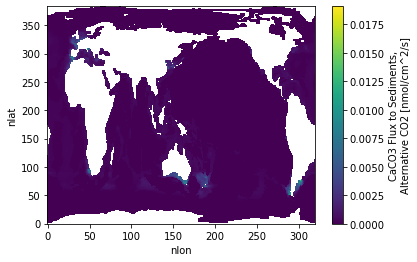

In [24]:
ds_tmp.calcToSed_ALT_CO2.plot()

In [25]:
#get CaCO3 ALT CO2 REMIN
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/mean5thIAF/mean_IAF5_CaCO3_ALT_CO2_REMIN.nc'
ds_tmp = xr.open_dataset(file,decode_times=False,decode_coords=False)
cesm_ann_ds['CaCO3_REMIN_1000mDLS']=ds_tmp['CaCO3_ALT_CO2_REMIN']

In [26]:
#get CaCO3 ALT CO2 FLUX IN
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/mean5thIAF/mean_IAF5_CaCO3_ALT_CO2_FLUX_IN.nc'
ds_tmp = xr.open_dataset(file,decode_times=False,decode_coords=False)
cesm_ann_ds['CaCO3_FLUX_IN_1000mDLS']=ds_tmp['CaCO3_ALT_CO2_FLUX_IN']

### Now DS has everything we need

In [27]:
cesm_ann_ds

<xarray.Dataset>
Dimensions:                 (nlat: 384, nlon: 320, z_t: 60)
Coordinates:
  * z_t                     (z_t) float32 500.0 1500.0 ... 512502.8 537500.0
Dimensions without coordinates: nlat, nlon
Data variables:
    TLONG                   (nlat, nlon) float64 ...
    TLAT                    (nlat, nlon) float64 ...
    ALK                     (z_t, nlat, nlon) float32 ...
    ALK_noGCB               (z_t, nlat, nlon) float32 ...
    calcToSed               (nlat, nlon) float32 ...
    calcToSed_noGCB         (nlat, nlon) float32 ...
    CaCO3_REMIN_noGCB       (z_t, nlat, nlon) float32 ...
    CaCO3_REMIN             (z_t, nlat, nlon) float32 ...
    CaCO3_FLUX_IN           (z_t, nlat, nlon) float32 ...
    CaCO3_FLUX_IN_noGCB     (z_t, nlat, nlon) float32 ...
    ALK_2xGCB               (z_t, nlat, nlon) float32 ...
    calcToSed_2xGCB         (nlat, nlon) float32 ...
    CaCO3_REMIN_2xGCB       (z_t, nlat, nlon) float32 ...
    CaCO3_FLUX_IN_2xGCB     (z_t, nlat, nlon) float32 ...
    ALK_100mDLS             (z_t, nlat, nlon) float32 ...
    calcToSed_100mDLS       (nlat, nlon) float32 ...
    CaCO3_REMIN_100mDLS     (z_t, nlat, nlon) float32 ...
    CaCO3_FLUX_IN_100mDLS   (z_t, nlat, nlon) float32 ...
    ALK_1000mDLS            (z_t, nlat, nlon) float32 ...
    calcToSed_1000mDLS      (nlat, nlon) float32 ...
    CaCO3_REMIN_1000mDLS    (z_t, nlat, nlon) float32 ...
    CaCO3_FLUX_IN_1000mDLS  (z_t, nlat, nlon) float32 ...

In [28]:
file = '/glade/work/kristenk/WOA_data/regrid_POP/WOA2013_POPgrid.nc' 
ds_woa = xr.load_dataset(file, decode_times=False, decode_coords=False)
ds_woa['z_t'] = cesm_ann_ds.z_t

In [29]:
lons=ds_woa.TLONG
lats=ds_woa.TLAT
area=ds_woa.TAREA
area_m=ds_woa.TAREA * 1e-4
depths_m=ds_woa.z_t * 0.01
dz=ds_woa.dz
dz_m=ds_woa.dz * 0.01

### Total up ALK control

In [30]:
glb_ALK= esmlab.weighted_sum(cesm_ann_ds.ALK, weights=area_m, dim=['nlat', 'nlon']).compute()
#dims: z_t
glb_ALK = esmlab.weighted_sum(glb_ALK, weights=dz_m, dim=['z_t']).compute()
#dims: none
glb_ALK = glb_ALK.values * 0.001* 1.e-15 #Pmol
glb_ALK

3208.922838861527

### Total up ALK noGCB

In [31]:
glb_ALK_noGCB= esmlab.weighted_sum(cesm_ann_ds.ALK_noGCB, weights=area_m, dim=['nlat', 'nlon']).compute()
#dims: z_t
glb_ALK_noGCB = esmlab.weighted_sum(glb_ALK_noGCB, weights=dz_m, dim=['z_t']).compute()
#dims: none
glb_ALK_noGCB = glb_ALK_noGCB.values * 0.001* 1.e-15 #Pmol
glb_ALK_noGCB

3211.8604487720595

### Total up ALK 100m DLS

In [32]:
glb_ALK_100mDLS= esmlab.weighted_sum(cesm_ann_ds.ALK_100mDLS, weights=area_m, dim=['nlat', 'nlon']).compute()
#dims: z_t
glb_ALK_100mDLS = esmlab.weighted_sum(glb_ALK_100mDLS, weights=dz_m, dim=['z_t']).compute()
#dims: none
glb_ALK_100mDLS = glb_ALK_100mDLS.values * 0.001* 1.e-15 #Pmol
glb_ALK_100mDLS

3210.6482291577568

### Total up ALK 1000m DLS

In [33]:
glb_ALK_1000mDLS= esmlab.weighted_sum(cesm_ann_ds.ALK_1000mDLS, weights=area_m, dim=['nlat', 'nlon']).compute()
#dims: z_t
glb_ALK_1000mDLS = esmlab.weighted_sum(glb_ALK_1000mDLS, weights=dz_m, dim=['z_t']).compute()
#dims: none
glb_ALK_1000mDLS = glb_ALK_1000mDLS.values * 0.001* 1.e-15 #Pmol
glb_ALK_1000mDLS

3207.7686909443564

### Total up ALK 2xGCB

In [34]:
glb_ALK_2xGCB= esmlab.weighted_sum(cesm_ann_ds.ALK_2xGCB, weights=area_m, dim=['nlat', 'nlon']).compute()
#dims: z_t
glb_ALK_2xGCB = esmlab.weighted_sum(glb_ALK_2xGCB, weights=dz_m, dim=['z_t']).compute()
#dims: none
glb_ALK_2xGCB = glb_ALK_2xGCB.values * 0.001* 1.e-15 #Pmol
glb_ALK_2xGCB

3205.9852518949533

In [35]:
diff = glb_ALK_noGCB - glb_ALK_2xGCB
diff/glb_ALK_2xGCB * 100. #maximum percent difference in ALK inventory between simulations

0.18325713986468137

In [36]:
alk_diffs = [glb_ALK_noGCB,glb_ALK_100mDLS,glb_ALK,glb_ALK_1000mDLS,glb_ALK_2xGCB]
labels = ['noGCB','100mDLS','control','1000mDLS','2xGCB']
positions = [1,2,3,4,5]

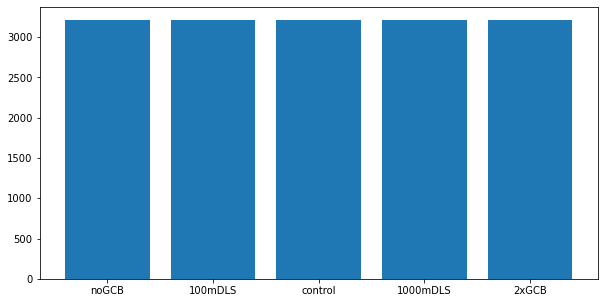

In [37]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

ax.bar(positions,alk_diffs)
plt.xticks(positions, labels);

(3200.0, 3220.0)

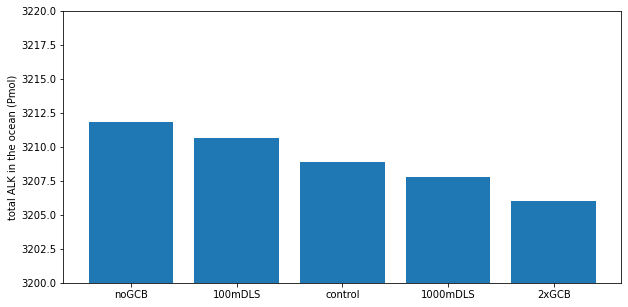

In [38]:

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

ax.bar(positions,alk_diffs)
plt.xticks(positions, labels)
plt.ylabel('total ALK in the ocean (Pmol)')
ax.set_ylim(3200,3220)

### Experiments that have more particulate CaCO3 in the water column have less alkalinity

### Burial of CaCO3 could also influence alkalinity inventory

### look at calcToSed vars south of 30°S

In [39]:
cesm_ann_ds.calcToSed_noGCB.units

'nmol/cm^2/s'

In [40]:
calc2sed_noGCB= esmlab.weighted_mean(cesm_ann_ds.calcToSed_noGCB.where(lats<-30), weights=area_m, dim=['nlat', 'nlon']).compute()
calc2sed_noGCB = calc2sed_noGCB.values * 86400. * 1.e-9 * 1.e3 * 1.e4 #converting to mmol/m2/day
calc2sed_noGCB

0.1193938621891784

In [41]:
calc2sed_100DLS= esmlab.weighted_mean(cesm_ann_ds.calcToSed_100mDLS.where(lats<-30), weights=area_m, dim=['nlat', 'nlon']).compute()
calc2sed_100DLS = calc2sed_100DLS.values * 86400. * 1.e-9 * 1.e3 * 1.e4 #converting to mmol/m2/day
calc2sed_100DLS

0.05408734404343691

In [42]:
calc2sed_control= esmlab.weighted_mean(cesm_ann_ds.calcToSed.where(lats<-30), weights=area_m, dim=['nlat', 'nlon']).compute()
calc2sed_control = calc2sed_control.values * 86400. * 1.e-9 * 1.e3 * 1.e4 #converting to mmol/m2/day
calc2sed_control

0.12751060847565807

In [43]:
calc2sed_1000mDLS= esmlab.weighted_mean(cesm_ann_ds.calcToSed_1000mDLS.where(lats<-30), weights=area_m, dim=['nlat', 'nlon']).compute()
calc2sed_1000mDLS = calc2sed_1000mDLS.values * 86400. * 1.e-9 * 1.e3 * 1.e4 #converting to mmol/m2/day
calc2sed_1000mDLS

0.18217444248627154

In [44]:
calc2sed_2xGCB= esmlab.weighted_mean(cesm_ann_ds.calcToSed_2xGCB.where(lats<-30), weights=area_m, dim=['nlat', 'nlon']).compute()
calc2sed_2xGCB = calc2sed_2xGCB.values * 86400. * 1.e-9 * 1.e3 * 1.e4 #converting to mmol/m2/day
calc2sed_2xGCB

0.14592555534054485

In [45]:
calc2seds = [calc2sed_noGCB,calc2sed_100DLS,calc2sed_control,calc2sed_1000mDLS,calc2sed_2xGCB]
labels = ['noGCB','100DLS','control','1000mDLS','2xGCB']
positions = [1,2,3,4,5]

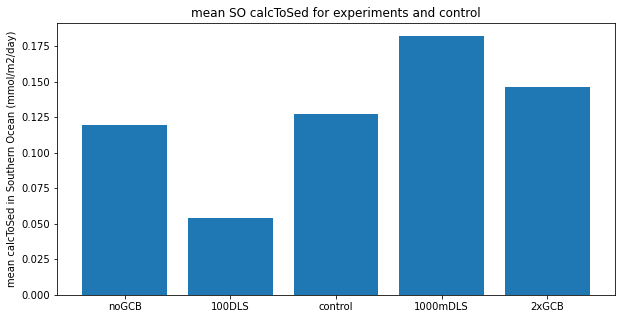

In [46]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.set_title('mean SO calcToSed for experiments and control')
plt.ylabel('mean calcToSed in Southern Ocean (mmol/m2/day)')
ax.bar(positions,calc2seds)
plt.xticks(positions, labels);

### • As I understand it, calcToSed is influenced by (1) carbonate chemistry & (2) CaCO3 flux to bottom.

### • In the noGCB and 2xGCB experiments, only the carbonate chemistry is different than the control (CaCO3_FLUX_IN and CaCO3_ALT_CO2_FLUX_IN are exactly the same), so only ALT_CO2 carbonate chemistry variables influence calcToSed_ALT_CO2.

### • In the 100mDLS and 1000mDLS, the ALT_CO2 vars for CaCO3_FLUX_IN and carbonate chemistry are different and BOTH influence calcToSed_ALT_CO2.

### Perhaps better to look at these experiments in two groups, based on what is influencing calcToSed

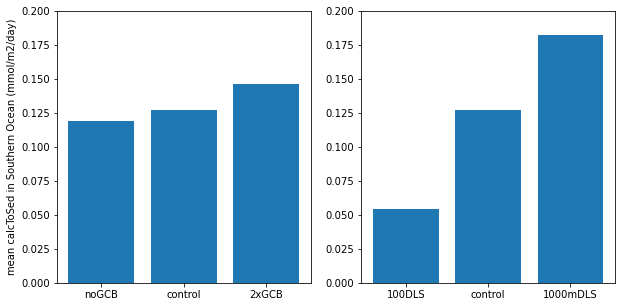

In [47]:
fig = plt.figure(figsize=(10,5))

calc2seds = [calc2sed_noGCB,calc2sed_control,calc2sed_2xGCB]
labels = ['noGCB','control','2xGCB']
positions = [1,2,3]

ax = fig.add_subplot(1,2,1)
ax.bar(positions,calc2seds)
plt.xticks(positions, labels)
ax.set_ylim(0,0.2)
plt.ylabel('mean calcToSed in Southern Ocean (mmol/m2/day)')
calc2seds = [calc2sed_100DLS,calc2sed_control,calc2sed_1000mDLS]
labels = ['100DLS','control','1000mDLS']

positions = [1,2,3]
ax = fig.add_subplot(1,2,2)
ax.bar(positions,calc2seds)
ax.set_ylim(0,0.2)
plt.xticks(positions, labels);


In [48]:
convert = 86400. * 1.e-9 * 1.e3 * 1.e4

In [49]:
diff_noGCB = cesm_ann_ds.calcToSed_noGCB - cesm_ann_ds.calcToSed
diff_noGCB = diff_noGCB * convert

In [50]:
diff_2xGCB = cesm_ann_ds.calcToSed_2xGCB - cesm_ann_ds.calcToSed
diff_2xGCB = diff_2xGCB * convert

In [51]:
diff_100mDLS = cesm_ann_ds.calcToSed_100mDLS - cesm_ann_ds.calcToSed
diff_100mDLS = diff_100mDLS * convert

In [52]:
diff_1000mDLS = cesm_ann_ds.calcToSed_1000mDLS - cesm_ann_ds.calcToSed
diff_1000mDLS = diff_1000mDLS * convert

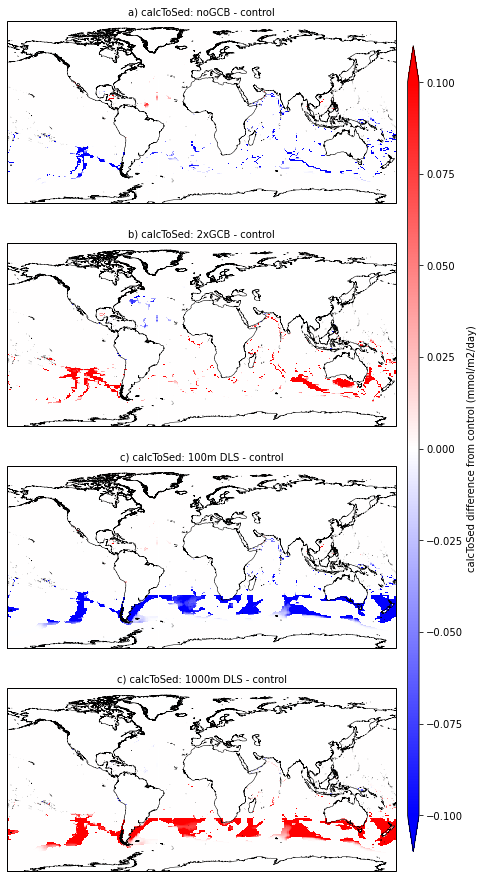

In [53]:
fig = plt.figure(figsize=(8,16))

#---- noGCB diff
ax = fig.add_subplot(4,1,1, projection=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('a) calcToSed: noGCB - control', fontsize=10)
pc1=ax.pcolormesh(lons, lats,diff_noGCB, vmin=-0.1, vmax=0.1, cmap='bwr',
                 transform=ccrs.PlateCarree())
#---- 2xGCB 
ax = fig.add_subplot(4,1,2, projection=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('b) calcToSed: 2xGCB - control', fontsize=10)
pc1=ax.pcolormesh(lons, lats, diff_2xGCB, vmin=-0.1, vmax=0.1, cmap='bwr',
                 transform=ccrs.PlateCarree())

#---- 100m DLS 
ax = fig.add_subplot(4,1,3, projection=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('c) calcToSed: 100m DLS - control', fontsize=10)
pc1=ax.pcolormesh(lons, lats, diff_100mDLS, vmin=-0.1, vmax=0.1, cmap='bwr',
                 transform=ccrs.PlateCarree())
#---- 1000m DLS 
ax = fig.add_subplot(4,1,4, projection=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('c) calcToSed: 1000m DLS - control', fontsize=10)
pc1=ax.pcolormesh(lons, lats, diff_1000mDLS, vmin=-0.1, vmax=0.1, cmap='bwr',
                 transform=ccrs.PlateCarree())

fig.subplots_adjust(right=0.8,hspace=0.1,wspace=0.1)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
cbar = fig.colorbar(pc1, cax=cbar_ax,label='calcToSed difference from control (mmol/m2/day)',extend='both')


### Also, look at the difference between CaCO3_FLUX_IN and CaCO3_REMIN at bottom ocean level
(see if this follows the same pattern)

In [54]:
dz

<xarray.DataArray 'dz' (z_t: 60)>
array([ 1000.    ,  1000.    ,  1000.    ,  1000.    ,  1000.    ,
        1000.    ,  1000.    ,  1000.    ,  1000.    ,  1000.    ,
        1000.    ,  1000.    ,  1000.    ,  1000.    ,  1000.    ,
        1000.    ,  1019.6808,  1056.4484,  1105.9951,  1167.807 ,
        1242.4133,  1330.9678,  1435.141 ,  1557.1259,  1699.6796,
        1866.2124,  2060.9023,  2288.8521,  2556.2471,  2870.575 ,
        3240.8372,  3677.7725,  4194.0308,  4804.2236,  5524.7544,
        6373.1919,  7366.9448,  8520.8926,  9843.6582, 11332.4658,
       12967.1992, 14705.3438, 16480.709 , 18209.1348, 19802.2344,
       21185.957 , 22316.5098, 23186.4941, 23819.4492, 24257.2168,
       24546.7793, 24731.0137, 24844.3281, 24911.9746, 24951.291 ,
       24973.5938, 24985.9609, 24992.6738, 24996.2441, 24998.1094])
Coordinates:
  * z_t      (z_t) float32 500.0 1500.0 2500.0 ... 487508.34 512502.8 537500.0
Attributes:
    units:      cm
    long_name:  thickness of layer k

In [55]:
layer=56

In [56]:
remainder_control = cesm_ann_ds.CaCO3_FLUX_IN[layer]*(1/dz[layer]) - cesm_ann_ds.CaCO3_REMIN[layer]

In [57]:
remainder_noGCB = cesm_ann_ds.CaCO3_FLUX_IN_noGCB[layer]*(1/dz[layer]) - cesm_ann_ds.CaCO3_REMIN_noGCB[layer]

In [58]:
remainder_2xGCB = cesm_ann_ds.CaCO3_FLUX_IN_2xGCB[layer]*(1/dz[layer]) - cesm_ann_ds.CaCO3_REMIN_2xGCB[layer]

In [59]:
remainder_100mDLS = cesm_ann_ds.CaCO3_FLUX_IN_100mDLS[layer]*(1/dz[layer]) - cesm_ann_ds.CaCO3_REMIN_100mDLS[layer]

In [60]:
remainder_1000mDLS = cesm_ann_ds.CaCO3_FLUX_IN_1000mDLS[layer]*(1/dz[layer]) - cesm_ann_ds.CaCO3_REMIN_1000mDLS[layer]

In [61]:
diff_noGCB = (remainder_noGCB - remainder_control) * 86400.
diff_2xGCB = (remainder_2xGCB - remainder_control) * 86400.
diff_100mDLS = (remainder_100mDLS - remainder_control) * 86400.
diff_1000mDLS = (remainder_1000mDLS - remainder_control) * 86400.

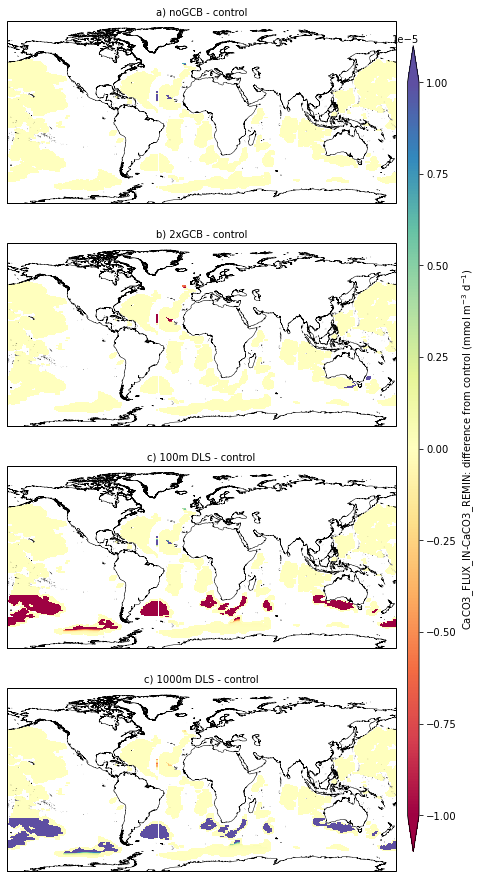

In [62]:
fig = plt.figure(figsize=(8,16))

#---- noGCB diff
ax = fig.add_subplot(4,1,1, projection=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('a) noGCB - control', fontsize=10)
pc1=ax.pcolormesh(lons, lats,diff_noGCB, vmin=-0.00001, vmax=0.00001,cmap='Spectral',
                 transform=ccrs.PlateCarree())
#---- 2xGCB 
ax = fig.add_subplot(4,1,2, projection=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('b) 2xGCB - control', fontsize=10)
pc1=ax.pcolormesh(lons, lats, diff_2xGCB, vmin=-0.00001, vmax=0.00001,cmap='Spectral',
                 transform=ccrs.PlateCarree())

#---- 100m DLS 
ax = fig.add_subplot(4,1,3, projection=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('c) 100m DLS - control', fontsize=10)
pc1=ax.pcolormesh(lons, lats, diff_100mDLS, vmin=-0.00001, vmax=0.00001,cmap='Spectral',
                 transform=ccrs.PlateCarree())
#---- 1000m DLS 
ax = fig.add_subplot(4,1,4, projection=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('c) 1000m DLS - control', fontsize=10)
pc1=ax.pcolormesh(lons, lats, diff_1000mDLS, vmin=-0.00001, vmax=0.00001,cmap='Spectral',
                 transform=ccrs.PlateCarree())

fig.subplots_adjust(right=0.8,hspace=0.1,wspace=0.1)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
cbar = fig.colorbar(pc1, cax=cbar_ax,label='CaCO3_FLUX_IN-CaCO3_REMIN: difference from control (mmol m$^{-3}$ d$^{-1}$)',extend='both')
